<a href="https://colab.research.google.com/github/OmarAlqahtani7/Projects/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVMs

## Imports and Data

We will be working with the breast cancer dataset as in the slides.

I have included the minimal sufficient imports to complete the coursework. You are welcome to import other modules.

Sensible comments/observations on any figures/answers will receive credit as in the formative assessments. It is better
to comment why you think your results may be wrong than to just leave a wrong figure!

In [ ]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data=load_breast_cancer()
X=data.data
y=data.target
X_train, X_test, y_train,y_test = train_test_split(X,y, stratify=y)
X_test+=np.random.rand(*X_test.shape)/20
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
del X
del y

## 1) Linear SVM for classification
### a) For different values of C, use SVC(kernel='linear') and compare the train and test performance of your classifier


In [ ]:
def SVC_model(kernel, C, X, Y):
  clf = SVC(kernel = kernel, C = C)
  return clf.fit(X,Y)

In [ ]:

C_values = np.logspace(-2, 2, 100) 


svc_test_scores = [] 
svc_train_scores = [] 


for C_value in C_values:

  clf = SVC_model('linear', C_value, X_train, y_train) 



  y_test_pred = clf.predict(X_test) 

  svc_test_score = accuracy_score(y_test,y_test_pred)  

  print(f"C value: {C_value}, test accuracy: {svc_test_score}")
  svc_test_scores.append(svc_test_score)


  y_train_pred = clf.predict(X_train)

  svc_train_score = accuracy_score(y_train,y_train_pred) 
  print(f"C value: {C_value}, train accuracy: {svc_train_score}")
  svc_train_scores.append(svc_train_score)

C value: 0.01, test accuracy: 0.9370629370629371
C value: 0.01, train accuracy: 0.9694835680751174
C value: 0.010974987654930561, test accuracy: 0.9370629370629371
C value: 0.010974987654930561, train accuracy: 0.9694835680751174
C value: 0.012045035402587823, test accuracy: 0.9440559440559441
C value: 0.012045035402587823, train accuracy: 0.9694835680751174
C value: 0.013219411484660288, test accuracy: 0.9370629370629371
C value: 0.013219411484660288, train accuracy: 0.9694835680751174
C value: 0.014508287784959394, test accuracy: 0.9370629370629371
C value: 0.014508287784959394, train accuracy: 0.9694835680751174
C value: 0.015922827933410922, test accuracy: 0.9300699300699301
C value: 0.015922827933410922, train accuracy: 0.971830985915493
C value: 0.01747528400007684, test accuracy: 0.9300699300699301
C value: 0.01747528400007684, train accuracy: 0.9694835680751174
C value: 0.019179102616724886, test accuracy: 0.9300699300699301
C value: 0.019179102616724886, train accuracy: 0.9694

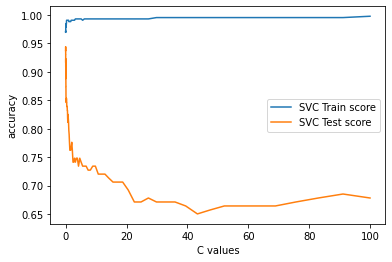

In [ ]:
plt.plot(C_values, svc_train_scores, label='SVC Train score')
plt.plot(C_values, svc_test_scores, label='SVC Test score')
plt.xlabel('C values')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### The plot and the results show how a different values of C affect the model. A high value cause overfitting on the training dataset which lower the performance on unseen datasets (test dataset). This can show that the C parameter act as regularisation parameter for the model, which seems to add some bias in the the training dataset as misclassification of some labels to avoid overfitting. 
### A small value of C helps to avoid overfitting by maxmising the margin, which makes the model generalise better.

### b) For each C compare the number of support vectors

In [ ]:
C_values = np.arange(0.001, 120, 0.1)
support_vector_values = []
for C_value in C_values:
  clf = SVC_model('linear', C_value, X_train, y_train)

  number_of_SV = clf.support_vectors_.shape[0]
  support_vector_values.append(number_of_SV)

  print(f"C value: {C_value : 0.3f}, number of support vectors: {number_of_SV}")

C value:  0.001, number of support vectors: 205
C value:  0.101, number of support vectors: 49
C value:  0.201, number of support vectors: 42
C value:  0.301, number of support vectors: 37
C value:  0.401, number of support vectors: 35
C value:  0.501, number of support vectors: 34
C value:  0.601, number of support vectors: 34
C value:  0.701, number of support vectors: 35
C value:  0.801, number of support vectors: 33
C value:  0.901, number of support vectors: 31
C value:  1.001, number of support vectors: 31
C value:  1.101, number of support vectors: 31
C value:  1.201, number of support vectors: 31
C value:  1.301, number of support vectors: 32
C value:  1.401, number of support vectors: 31
C value:  1.501, number of support vectors: 31
C value:  1.601, number of support vectors: 31
C value:  1.701, number of support vectors: 31
C value:  1.801, number of support vectors: 30
C value:  1.901, number of support vectors: 30
C value:  2.001, number of support vectors: 28
C value:  2.

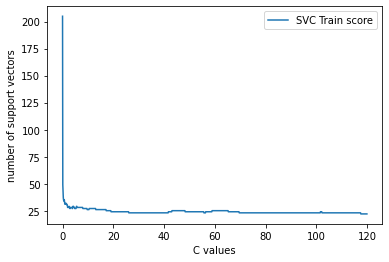

In [ ]:
plt.plot(C_values, support_vector_values, label='SVC Train score')
plt.xlabel('C values')
plt.ylabel('number of support vectors')
plt.legend()
plt.show()

### The outputs above highlights how the increase of the C value overfit the model by decreasing the number of support vectors. This does affect generlisation of the model.

### c) For an optimal value of C, compare the performance of the support vector classifier to Logistic regression/Nearest Centroid for different sized subsets of the training data

In [ ]:
from sklearn.model_selection import GridSearchCV


train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best_Cs = []
svc_test_scores1 = []
svc_train_scores1 = []


for train_size in train_sizes:
  if train_size < 1.0:
    X_train_s, _, y_train_s, _ = train_test_split(X_train, y_train, train_size=train_size)
  else:
    X_train_s, y_train_s = X_train, y_train
 
  optimal_modelSVC = GridSearchCV(SVC(kernel = 'linear'), {
    'C' : np.logspace(-2, 2, 100)
  },cv = 5)
  
  optimal_modelSVC.fit(X_train_s, y_train_s)
  best_C = optimal_modelSVC.best_params_['C']
  print(f"With {len(X_train_s)} examples, best C: {best_C}")
  best_Cs.append(best_C)

  y_test_pred = optimal_modelSVC.predict(X_test)
  svc_test_score = accuracy_score(y_test,y_test_pred)
  print("SVC test score: ",svc_test_score)
  svc_test_scores1.append(svc_test_score)

  y_train_pred = optimal_modelSVC.predict(X_train_s)
  svc_train_score = accuracy_score(y_train_s,y_train_pred)
  print("SVC train score: ",svc_train_score)
  svc_train_scores1.append(svc_train_score)

With 42 examples, best C: 0.01
SVC test score:  0.5664335664335665
SVC train score:  0.9523809523809523
With 85 examples, best C: 0.040370172585965536
SVC test score:  0.8601398601398601
SVC train score:  0.9882352941176471
With 127 examples, best C: 0.02104904144512021
SVC test score:  0.9230769230769231
SVC train score:  0.968503937007874
With 170 examples, best C: 0.08497534359086446
SVC test score:  0.9020979020979021
SVC train score:  0.9823529411764705
With 213 examples, best C: 0.13530477745798075
SVC test score:  0.8811188811188811
SVC train score:  1.0
With 255 examples, best C: 0.03678379771828634
SVC test score:  0.8811188811188811
SVC train score:  0.9725490196078431
With 298 examples, best C: 0.19630406500402714
SVC test score:  0.8461538461538461
SVC train score:  0.9865771812080537
With 340 examples, best C: 0.2848035868435802
SVC test score:  0.8461538461538461
SVC train score:  0.9911764705882353
With 383 examples, best C: 0.3125715849688237
SVC test score:  0.83916083

In [ ]:
# finding the optimal C for Logistic model 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
best_Cs_Logistic_clf = []
Logistic_clf_test_scores = []
Logistic_clf_train_scores = []

for train_size in train_sizes:
  if train_size < 1.0:
    X_train_s, _, y_train_s, _ = train_test_split(X_train, y_train, train_size=train_size)
  else:
    X_train_s, y_train_s = X_train, y_train

  Logistic_clf = GridSearchCV(LogisticRegression(), {
    'C' : np.logspace(-2, 2, 100)
  },cv = 5)

  Logistic_clf.fit(X_train_s, y_train_s)
  best_C_Logistic_clf = Logistic_clf.best_params_['C']
  print(f"With {len(X_train_s)} examples, best C: {best_C_Logistic_clf}")
  best_Cs_Logistic_clf.append(best_C_Logistic_clf)

  y_test_pred = Logistic_clf.predict(X_test)
  Logistic_test_score = accuracy_score(y_test,y_test_pred)
  print("Logistic test score: ",Logistic_test_score)
  Logistic_clf_test_scores.append(Logistic_test_score)

  y_train_pred = Logistic_clf.predict(X_train_s)
  Logistic_train_score = accuracy_score(y_train_s,y_train_pred)
  print("Logistic train score: ",Logistic_train_score)
  Logistic_clf_train_scores.append(Logistic_train_score)

With 42 examples, best C: 0.23644894126454083
Logistic test score:  0.8391608391608392
Logistic train score:  1.0
With 85 examples, best C: 1.0476157527896652
Logistic test score:  0.916083916083916
Logistic train score:  0.9882352941176471
With 127 examples, best C: 5.590810182512229
Logistic test score:  0.8181818181818182
Logistic train score:  1.0
With 170 examples, best C: 0.16297508346206444
Logistic test score:  0.8181818181818182
Logistic train score:  0.9647058823529412
With 213 examples, best C: 0.7220809018385468
Logistic test score:  0.7202797202797203
Logistic train score:  0.9859154929577465
With 255 examples, best C: 4.641588833612782
Logistic test score:  0.8811188811188811
Logistic train score:  0.996078431372549
With 298 examples, best C: 3.8535285937105312
Logistic test score:  0.8741258741258742
Logistic train score:  0.9966442953020134


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

With 340 examples, best C: 0.5994842503189411
Logistic test score:  0.8181818181818182
Logistic train score:  0.9911764705882353


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

With 383 examples, best C: 2.2051307399030455
Logistic test score:  0.8461538461538461
Logistic train score:  0.9895561357702349


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

With 426 examples, best C: 17.07352647470692
Logistic test score:  0.7692307692307693
Logistic train score:  0.9929577464788732


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
# finding the optimal C for Nearest Centroid model 
NC_train_scores = []
NC_test_scores = []

for train_size in train_sizes:
  if train_size < 1.0:
    X_train_s, _, y_train_s, _ = train_test_split(X_train, y_train, train_size=train_size)
  else:
    X_train_s, y_train_s = X_train, y_train
  NC_clf = NearestCentroid()
  NC_clf.fit(X_train_s, y_train_s)

  y_test_pred = NC_clf.predict(X_test)
  NC_test_score = accuracy_score(y_test,y_test_pred)
  print("nearest centroid test score: ",NC_test_score)
  NC_test_scores.append(NC_test_score)

  y_train_pred = NC_clf.predict(X_train_s)
  NC_train_score = accuracy_score(y_train_s,y_train_pred)
  print("nearest centroid train score: ",NC_train_score)
  NC_train_scores.append(NC_train_score)

nearest centroid test score:  0.5034965034965035
nearest centroid train score:  0.9047619047619048
nearest centroid test score:  0.6433566433566433
nearest centroid train score:  0.9764705882352941
nearest centroid test score:  0.7622377622377622
nearest centroid train score:  0.9133858267716536
nearest centroid test score:  0.7342657342657343
nearest centroid train score:  0.9352941176470588
nearest centroid test score:  0.8741258741258742
nearest centroid train score:  0.9295774647887324
nearest centroid test score:  0.8811188811188811
nearest centroid train score:  0.9411764705882353
nearest centroid test score:  0.7622377622377622
nearest centroid train score:  0.9362416107382551
nearest centroid test score:  0.8741258741258742
nearest centroid train score:  0.9411764705882353
nearest centroid test score:  0.8321678321678322
nearest centroid train score:  0.9477806788511749
nearest centroid test score:  0.8251748251748252
nearest centroid train score:  0.9366197183098591


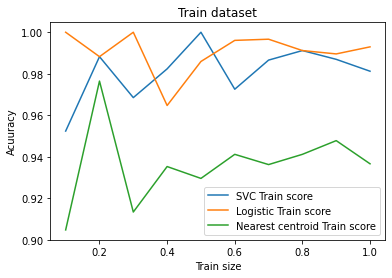

In [ ]:
#train
plt.plot(train_sizes, svc_train_scores1, label='SVC Train score')
plt.plot(train_sizes, Logistic_clf_train_scores, label='Logistic Train score')
plt.plot(train_sizes, NC_train_scores, label='Nearest centroid Train score')
plt.title('Train dataset')
plt.xlabel('Train size')
plt.ylabel('Acuuracy')
plt.legend()
plt.show()

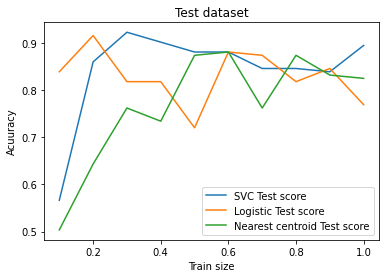

In [ ]:
plt.plot(train_sizes, svc_test_scores1, label='SVC Test score')
plt.plot(train_sizes, Logistic_clf_test_scores, label='Logistic Test score')
plt.plot(train_sizes, NC_test_scores, label='Nearest centroid Test score')
plt.title('Test dataset')
plt.xlabel('Train size')
plt.ylabel('Acuuracy')
plt.legend()
plt.show()

### we can see logistic regression and SVC with linear kernel preformed roughly the same on both predicting the binary classification problem of the training and testing dataset with good regularisation. While The Nearest centroid preformed the worse, which makes it not suitable for this type of data. Furthermore, it lacked a regularisation parameter which might have affected the performance as it lacks flexibility in complex datasets with noise.

### d) For difference values of nu, compare the train and test error as well as the number of support vectors

In [ ]:
from sklearn.svm import NuSVC


nu_values = np.arange(0.001, 0.5, 0.01)


results = []


for nu in nu_values:
  
  clf = NuSVC(kernel = 'linear', nu=nu)
  clf.fit(X_train, y_train)

  
  train_score = accuracy_score(y_train, clf.predict(X_train))
  test_score = accuracy_score(y_test, clf.predict(X_test))
  print(f" nu value: {nu} train accuracy: {train_score} test accuracy: {test_score} support vectors for both classes: {clf.support_vectors_.shape[0]}")

  
  results.append((nu, train_score, test_score, clf.support_vectors_.shape[0]))




 nu value: 0.001 train accuracy: 0.9882629107981221 test accuracy: 0.7342657342657343 support vectors for both classes: 23
 nu value: 0.011 train accuracy: 1.0 test accuracy: 0.6713286713286714 support vectors for both classes: 24
 nu value: 0.020999999999999998 train accuracy: 0.9953051643192489 test accuracy: 0.6643356643356644 support vectors for both classes: 24
 nu value: 0.030999999999999996 train accuracy: 0.9929577464788732 test accuracy: 0.7202797202797203 support vectors for both classes: 27
 nu value: 0.040999999999999995 train accuracy: 0.9929577464788732 test accuracy: 0.7482517482517482 support vectors for both classes: 28
 nu value: 0.05099999999999999 train accuracy: 0.9882629107981221 test accuracy: 0.7762237762237763 support vectors for both classes: 32
 nu value: 0.06099999999999999 train accuracy: 0.9906103286384976 test accuracy: 0.8391608391608392 support vectors for both classes: 34
 nu value: 0.071 train accuracy: 0.9882629107981221 test accuracy: 0.853146853146

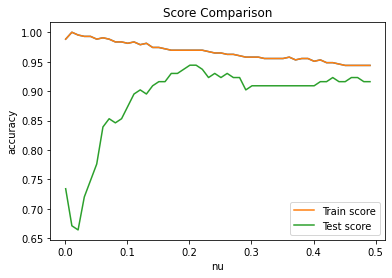

In [ ]:
train_scores = [result[1] for result in results]
test_scores = [result[2] for result in results]

plt.plot(nu_values, train_scores)
plt.plot(nu_values, train_scores, label='Train score')
plt.plot(nu_values, test_scores, label='Test score')
plt.title('Score Comparison')
plt.xlabel('nu')
plt.ylabel('accuracy')
plt.legend()
plt.show()


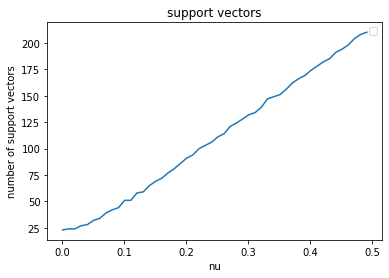

In [ ]:
number_support_vectors = [result[3] for result in results]
plt.plot(nu_values, number_support_vectors)
plt.title('support vectors')
plt.xlabel('nu')
plt.ylabel('number of support vectors')
plt.legend()
plt.show()


### it seems from the results and the plots above nu works slightly different than C, for nu the value range are more specific between 0-1 which might make it easier to optmise. In addition, the increasing the nu value makes the SVC model less likely to overfit. The demonstration in the score plot, show how the training accuracy decreases while the testing accuracy increase when the nu value increases.

## 2) Kernel Support Vector Machines

### a) For different values of degree (and default values of C) compare the performance of a support vector classifier

In [ ]:
degree_values = np.arange(1, 11, 1)

results = []


for degree in degree_values:
  
  clf = SVC(kernel= 'poly', degree=degree)
  clf.fit(X_train, y_train)


  train_score = accuracy_score(y_train, clf.predict(X_train))
  test_score = accuracy_score(y_test, clf.predict(X_test))
  
  results.append((degree, train_score, test_score, clf.support_vectors_.shape[0]))
  print(f" degree value: {degree} train accuracy: {train_score} test accuracy: {test_score} support vectors for both classes: {clf.support_vectors_.shape[0]}")


 degree value: 1 train accuracy: 0.9741784037558685 test accuracy: 0.9090909090909091 support vectors for both classes: 65
 degree value: 2 train accuracy: 0.8333333333333334 test accuracy: 0.6783216783216783 support vectors for both classes: 239
 degree value: 3 train accuracy: 0.9225352112676056 test accuracy: 0.916083916083916 support vectors for both classes: 137
 degree value: 4 train accuracy: 0.8309859154929577 test accuracy: 0.7412587412587412 support vectors for both classes: 225
 degree value: 5 train accuracy: 0.8497652582159625 test accuracy: 0.9300699300699301 support vectors for both classes: 166
 degree value: 6 train accuracy: 0.8215962441314554 test accuracy: 0.7902097902097902 support vectors for both classes: 240
 degree value: 7 train accuracy: 0.8309859154929577 test accuracy: 0.8671328671328671 support vectors for both classes: 188
 degree value: 8 train accuracy: 0.8145539906103286 test accuracy: 0.7692307692307693 support vectors for both classes: 244
 degree va

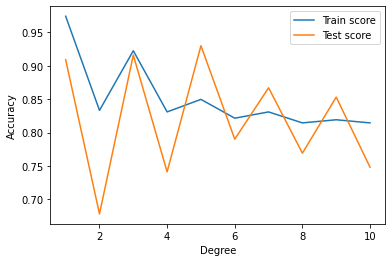

In [ ]:
degree_values = [result[0] for result in results]
train_score = [result[1] for result in results]
test_score = [result[2] for result in results]

plt.plot(degree_values, train_score, label='Train score')
plt.plot(degree_values, test_score, label='Test score')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



### results of the two outputs shows how the effect of the degree parameter, increasing the value of degree resulted in fluctuated test scores but for the train scores it kept decreasing.

### b) For the optimal degree polynomial kernel, compare the performance of the polynomial and linear svm classifiers

In [ ]:
clf = SVC(kernel="poly")
GS = GridSearchCV(clf, {"degree": np.arange(1, 11, 1)}, cv=10)
GS.fit(X_train, y_train)

print("The optimal degree is: ", GS.best_params_["degree"])

The optimal degree is:  1


In [ ]:

linear_kernel_svc = SVC(kernel="linear")
linear_kernel_svc.fit(X_train, y_train)

poly_kernel_svc = SVC(kernel="poly", degree=1)
poly_kernel_svc.fit(X_train, y_train)

linear_score = accuracy_score(y_test, linear_kernel_svc.predict(X_test))
poly_score = accuracy_score(y_test, poly_kernel_svc.predict(X_test))
print(f"linear kernel SVC test score:{linear_score * 100:.2f} poly kernel SVC test score:{poly_score * 100:.2f}")

if linear_score > poly_score:
    print(f"The linear SVM performed better with an accuracy of {linear_score * 100:.2f}")
else:
    print(f"The polynomial SVM performed better with an accuracy of {poly_score * 100:.2f}")


linear kernel SVC test score:79.72 poly kernel SVC test score:90.91
The polynomial SVM performed better with an accuracy of 90.91


### the polynomial kernel performed better as it allows more felxibilities for the decision boundary. Although the degree is 1 which should make the poly kernel the same as the linear kernel theoretically, but the implementation in sklearn changes that. As it allows for more parameters in the poly kernel.

## 3) Distribution of Errors (similar to lecture slides!)

### a) Using s=[342, 273, 205, 137, 68, 34, 27, 20] and taking 100 random samples of size s without replacement from the training data compare the distribution of errors or accuracy for the 'nearest centroid' classifier and a linear SVC

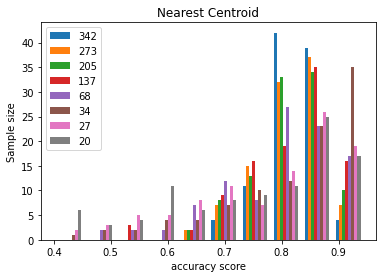

In [ ]:
from sklearn.utils import resample
s = [342, 273, 205, 137, 68, 34, 27, 20]

error_scores = [] 

for sample_size in s:
  
  samples = [resample(X_train, y_train, n_samples=sample_size) for _ in range(100)]
  
  sample_error_scores = []
  
  for X_train_sample, y_train_sample in samples:
   
    nearest_centroid = NearestCentroid()
    
    
    nearest_centroid.fit(X_train_sample, y_train_sample)
    
    
    y_pred = nearest_centroid.predict(X_test)
  #  print(f"the observations size: {len(X_train_sample)}, test accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}")
    
    sample_error_scores.append(accuracy_score(y_test, y_pred))
  
  
  error_scores.append(sample_error_scores)
   

plt.hist(error_scores, bins=10, label=s)
plt.title('Nearest Centroid')
plt.xlabel('accuracy score')
plt.ylabel('Sample size')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

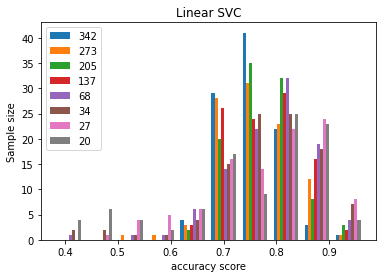

In [ ]:
error_scores = [] 


for sample_size in s:
  
  samples = [resample(X_train, y_train, n_samples=sample_size) for _ in range(100)]
  
  sample_error_scores = []
  
  for X_train_sample, y_train_sample in samples:

    linear_svc = LinearSVC()
    linear_svc.fit(X_train_sample, y_train_sample)
    y_pred = linear_svc.predict(X_test)

 #   print(f"the observations size: {len(X_train_sample)}, test accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}")
    sample_error_scores.append(accuracy_score(y_test, y_pred))
  
 
  error_scores.append(sample_error_scores)
  
plt.hist(error_scores, bins=10, label=s)
plt.title('Linear SVC')
plt.xlabel('accuracy score')
plt.ylabel('Sample size')
plt.legend()
plt.show()



### The performance of the Nearest centroid classifier model in low sizes of observations 20-137 in 100 random samples was reasonably good. and it seems the model can deal with low size of observations which can save computaional power. The accuracy for low observations ranged mostly between 0.8 - 0.95 accuracy score.

### while for linearSVC the majority of the sampling for different observations sizes is within 0.7-0.9 accuracy score range. but for both models the most stable result which makes it more reliable is with 342 observation size wich might be the suitable size for realiability.


